In [18]:
import requests
import json

In [60]:
path_api = "http://api.openweathermap.org/data/2.5/forecast?q={}&appid=3543ac0c00624ed3bb653359621e5344"
prev = requests.get(path_api.format(ville))
data_prev = prev.json()
print(json.dumps(data_prev, sort_keys = True, indent = 4))


{
    "city": {
        "coord": {
            "lat": 52.0938,
            "lon": 23.6852
        },
        "country": "BY",
        "id": 629634,
        "name": "Brest",
        "population": 300715
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 36
            },
            "dt": 1531224000,
            "dt_txt": "2018-07-10 12:00:00",
            "main": {
                "grnd_level": 1009.51,
                "humidity": 61,
                "pressure": 1009.51,
                "sea_level": 1028.51,
                "temp": 299.49,
                "temp_kf": 1.56,
                "temp_max": 299.49,
                "temp_min": 297.936
            },
            "sys": {
                "pod": "d"
            },
            "weather": [
                {
                    "description": "scattered clouds",
                    "icon": "03d",
                    "id": 802,
                    "main": "Clouds"
          

In [26]:
pays = data_prev["city"]["country"]

In [64]:
data_prev["list"][14]["rain"]["3h"] 

1.565

In [66]:
import sys

try:
    rain = data_prev["list"][14]["rain"]["3h"]
except KeyError:
    rain = 0
else:
    rain = data_prev["list"][14]["rain"]["3h"]
print(rain)

1.565


In [31]:
def convert(kel):
    celsius = (kel- 273.15)
    return round(celsius, 2)
#convert(300)   

In [32]:
print("²²²² Bienvenue sur Weather Me ! B) ²²²²")
print("**** Le logiciel de prévision météo des 5 prochains jours. ****")

²²²² Bienvenue sur Weather Me ! B) ²²²²
**** Le logiciel de prévision météo des 5 prochains jours. ****


In [59]:
ville = input("Quelle ville souhaitez-vous connaître la météo : ")
r = requests.get("http://api.openweathermap.org/data/2.5/weather?q={}&appid=3543ac0c00624ed3bb653359621e5344".format(ville))
data = r.json()
prev = requests.get("http://api.openweathermap.org/data/2.5/forecast?q={}&appid=3543ac0c00624ed3bb653359621e5344".format(ville))
data_prev = prev.json()

date_jour = input("Entrée le numéro en deux chiffre (ex: 05, 15) de la journée don vous voulez connaitre les prévision météo: ")
date_mois = input("Cette fois entrée le mois: ")
date = "2018-"+date_mois+"-"+date_jour


Quelle ville souhaitez-vous connaître la météo : brest
Entrée le numéro en deux chiffre (ex: 05, 15) de la journée don vous voulez connaitre les prévision météo: 11
Cette fois entrée le mois: 07


In [71]:
list_date = []
list_celsius = []
list_rain = []
print(date)
for i in range(len(data_prev["list"])):
    if date == data_prev["list"][i]["dt_txt"][0:10]:
        print(data_prev["list"][i]["dt_txt"][11:])
        print(str(convert(data_prev["list"][i]["main"]["temp"]))+"°C")
        try:
            rain = data_prev["list"][i]["rain"]["3h"]
        except KeyError:
            rain = 0
            print(rain)
        else:
            rain = data_prev["list"][i]["rain"]["3h"]
            print(rain)
        list_date.append(data_prev["list"][i]["dt_txt"][11:16])
        list_celsius.append(convert(data_prev["list"][i]["main"]["temp"]))
        list_rain.append(rain)
        print("")
        
        

2018-07-11
00:00:00
16.35°C
0

03:00:00
14.4°C
0

06:00:00
21.68°C
0

09:00:00
25.02°C
0

12:00:00
25.43°C
0

15:00:00
25.32°C
0

18:00:00
23.5°C
0

21:00:00
19.34°C
0



In [75]:
temp_moyenne = np.mean(list_celsius)
print(temp_moyenne)
rain_moyenne = np.mean(list_rain)
print(rain_moyenne)
print(date)
print(ville)
print(pays)

21.380000000000003
0.0
2018-07-11
brest
FR


'2018-07-11'

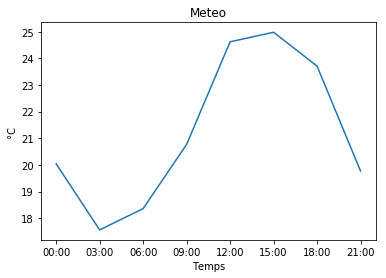

In [37]:
import matplotlib.pyplot as plt

plt.title("Meteo")
plt.plot(list_date, list_celsius)
plt.xlabel('Temps')
plt.ylabel('°C')
plt.show()